##  Profitability Ratio Comparison

#### Importing Dependencies

In [6]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

#### API login

In [7]:
te.login('jupyter:jupyter'); # Signup for a free API key at https://developer.tradingeconomics.com/

In [8]:
def plotProfitability(companies_dataframes_list,companies_symbols_list):
    fix, ax6 = plt.subplots(figsize=(15,5))
    
    plot_counter = 0
    for company_dataframe in companies_dataframes_list:
        ax6.plot(company_dataframe['date'].astype('datetime64'), company_dataframe['profitability'],  label=companies_symbols_list[plot_counter] ) 
        plot_counter +=1
    
    ax6.set_title("Profitability Ratio")
    plt.style.use('bmh')
    ax6.legend()


def getProfitabilityDataframe(profit_converted_dataframe, sales_converted_dataframe):
    profit_sales_dataframe = profit_converted_dataframe[['date','real_value']]
    profit_sales_dataframe = profit_sales_dataframe.rename(columns={'real_value': 'profit'})
    
    profit_sales_dataframe['sales'] = sales_converted_dataframe[['real_value']]
    profit_sales_dataframe = profit_sales_dataframe.assign(profitability = profit_sales_dataframe['profit'] / profit_sales_dataframe['sales'])
    return profit_sales_dataframe

def getConvertedDataFrame(dataframe, unit):
    dataframe['unit'] = unit
    dataframe = dataframe.assign(real_value=dataframe['value'].astype('string') + dataframe['unit'])
    dataframe['real_value'] = dataframe['real_value'].astype('float')
    return dataframe
    
    

def getUnit(company_symbol, financialSymbol):
    time.sleep(0.5)
    raw_data = te.getFinancialsData(company_symbol, 'df')
    return raw_data.query(f'financialSymbol =="{financialSymbol}"')['unit']

def getDataAndConvert(company_symbol, category):
    unit = getUnit(company_symbol, category)
    time.sleep(0.5)
    data_frame = te.getHistoricalFinancials(symbol=company_symbol, category=category, output_type='df')
    converted_data_frame = getConvertedDataFrame(data_frame, unit.values[0])
    return converted_data_frame

def getCompanyDataFrame(company_symbol):
    time.sleep(0.5)
    profit_converted_dataframe = getDataAndConvert(company_symbol, 'gross-profit-on-sales')
    
    time.sleep(0.5)
    sales_converted_dataframe = getDataAndConvert(company_symbol, 'sales')
    
    time.sleep(0.5)
    profitability_dataframe = getProfitabilityDataframe(profit_converted_dataframe, sales_converted_dataframe)
    
    return profitability_dataframe
    
    

def getCompaniesProfitability(companies_symbols_list):
    
    companies_dataframes_list = []
    
    for company_symbol in companies_symbols_list:
        companies_dataframes_list.append(getCompanyDataFrame(company_symbol))
    
    plotProfitability(companies_dataframes_list, companies_symbols_list)
    

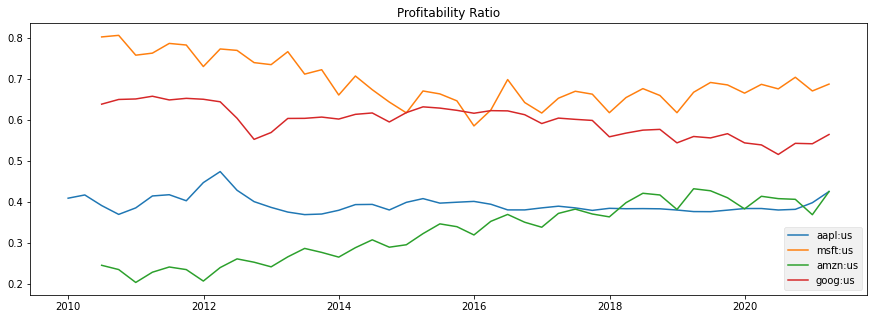

In [9]:
companies_symbols_list = ['aapl:us','msft:us','amzn:us', 'goog:us']
getCompaniesProfitability(companies_symbols_list)